# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [1]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_2_food\4.3 FourColumns 3+1csv\fastFood_2020.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [2]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
           ...  
419371    Monday
419372    Monday
419373    Monday
419374    Monday
419375    Monday
Name: weekdays, Length: 419376, dtype: object

### Extract the time and map it onto a new column called "time"

In [3]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         17:59:58
1         17:59:45
2         18:59:07
3         18:59:02
4         17:58:52
            ...   
419371    19:05:10
419372    16:04:42
419373    18:02:57
419374    18:02:47
419375    17:00:21
Name: time, Length: 419376, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [4]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,@Rudebwoytev @_NikSpace So does Starbucks!,-97.552161,35.482844,2020-01-20 17:59:58,Monday,17:59:58,5PM-6PM
1,I have been in contact with @BurgerKing and th...,-87.732013,41.833584,2020-01-20 17:59:45,Monday,17:59:45,5PM-6PM
2,Currently working on my Choose Your Own Advent...,-73.741246,43.103864,2020-01-20 18:59:07,Monday,18:59:07,6PM-7PM
3,Is it me or do McDonalds hire anyone,-81.705467,41.495940,2020-01-20 18:59:02,Monday,18:59:02,6PM-7PM
4,@tumamas__ @briellaa15 Lmaoooo I told him I wa...,-98.339928,29.555818,2020-01-20 17:58:52,Monday,17:58:52,5PM-6PM
...,...,...,...,...,...,...,...
419371,@aobrien7 @tacobell Always yes,-73.968542,40.780709,2020-01-20 19:05:10,Monday,19:05:10,7PM-8PM
419372,I’m about to smoke eat Taco Bell and play Mine...,-123.095999,44.631133,2020-01-20 16:04:42,Monday,16:04:42,4PM-5PM
419373,Like our business? Review us on Google+ and ge...,-87.776914,42.103623,2020-01-20 18:02:57,Monday,18:02:57,6PM-7PM
419374,Burritos for the arts - what could be better! ...,-88.014413,41.808188,2020-01-20 18:02:47,Monday,18:02:47,6PM-7PM


### Get the value counts of "weekdays"

In [5]:
df3['weekdays'].value_counts()

Tuesday      66113
Wednesday    65460
Thursday     64815
Friday       62391
Monday       56562
Saturday     53995
Sunday       50040
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [6]:
df3['time groups'].value_counts()

12PM-1PM     28979
1PM-2PM      27247
11AM-12PM    26668
10AM-11AM    25440
2PM-3PM      25370
6PM-7PM      24143
3PM-4PM      24135
7PM-8PM      23826
4PM-5PM      23203
9AM-10AM     23194
5PM-6PM      23178
8PM-9PM      23027
9PM-10PM     21546
8AM-9AM      18891
10PM-11PM    18244
11PM-12AM    14168
7AM-8AM      12715
12AM-1AM     10034
6AM-7AM       6434
1AM-2AM       6253
2AM-3AM       4025
5AM-6AM       3252
3AM-4AM       2783
4AM-5AM       2404
other          217
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [7]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,@Rudebwoytev @_NikSpace So does Starbucks!,-97.552161,35.482844,2020-01-20 17:59:58,Monday,17:59:58,5PM-6PM
1,I have been in contact with @BurgerKing and th...,-87.732013,41.833584,2020-01-20 17:59:45,Monday,17:59:45,5PM-6PM
2,Currently working on my Choose Your Own Advent...,-73.741246,43.103864,2020-01-20 18:59:07,Monday,18:59:07,6PM-7PM
3,Is it me or do McDonalds hire anyone,-81.705467,41.495940,2020-01-20 18:59:02,Monday,18:59:02,6PM-7PM
4,@tumamas__ @briellaa15 Lmaoooo I told him I wa...,-98.339928,29.555818,2020-01-20 17:58:52,Monday,17:58:52,5PM-6PM
...,...,...,...,...,...,...,...
419371,@aobrien7 @tacobell Always yes,-73.968542,40.780709,2020-01-20 19:05:10,Monday,19:05:10,7PM-8PM
419372,I’m about to smoke eat Taco Bell and play Mine...,-123.095999,44.631133,2020-01-20 16:04:42,Monday,16:04:42,4PM-5PM
419373,Like our business? Review us on Google+ and ge...,-87.776914,42.103623,2020-01-20 18:02:57,Monday,18:02:57,6PM-7PM
419374,Burritos for the arts - what could be better! ...,-88.014413,41.808188,2020-01-20 18:02:47,Monday,18:02:47,6PM-7PM


### Define the efficiency scores for the heat map

In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #526.875 1145.0 2175.125 2935.5 3286.25 3595.5 3850.125 4630
            #putting the tweets into categorical buckets
            if  instance_val >=  quartile_15 and instance_val <quartile_16+1:
                sum1 = 16
            elif instance_val >= quartile_14 and instance_val < quartile_15:
                sum1 = 15
            elif  instance_val >=  quartile_13 and instance_val <quartile_14:
                sum1 = 14
            elif instance_val >= quartile_12 and instance_val < quartile_13:
                sum1 = 13
            elif instance_val >= quartile_11 and instance_val < quartile_12:
                sum1 = 12
            elif instance_val >= quartile_10 and instance_val < quartile_11:
                sum1 = 11
            elif instance_val >= quartile_9 and instance_val < quartile_10:
                sum1 = 10
            elif instance_val >=  quartile_8 and instance_val <quartile_9:
                sum1 = 9
            elif instance_val >= quartile_7 and instance_val <quartile_8:
                sum1 = 8
            elif instance_val >= quartile_6 and instance_val < quartile_7:
                sum1 = 7
            elif instance_val >= quartile_5 and instance_val < quartile_6:
                sum1 = 6
            elif instance_val >= quartile_4 and instance_val < quartile_5:
                sum1 = 5
            elif instance_val >= quartile_3 and instance_val < quartile_4:
                sum1 = 4
            elif instance_val >=  quartile_2 and instance_val <quartile_3:
                sum1 = 3
            elif instance_val >= quartile_1 and instance_val <quartile_2:
                sum1 = 2
            else:
                sum1 = 1
        
        array1.append(sum1)
        
    print(array2)
    return array1

### Heat map for Tweets

[1270, 762, 517, 399, 294, 445, 905, 1646, 2365, 2900, 3169, 3407, 3850, 3604, 3379, 3151, 3085, 3231, 3360, 3471, 3296, 3235, 2742, 2047]
[1404, 826, 528, 343, 363, 499, 1037, 2017, 3020, 3520, 3842, 4043, 4593, 4372, 3853, 3830, 3764, 3719, 4108, 3931, 3851, 3550, 2878, 2191]
[1473, 863, 519, 351, 333, 492, 1029, 2162, 3257, 3650, 3873, 4079, 4630, 4240, 3956, 3789, 3644, 3684, 3763, 3633, 3621, 3342, 2934, 2109]
[1469, 892, 579, 396, 354, 531, 1111, 2078, 3041, 3736, 3924, 4089, 4515, 4099, 4036, 3836, 3645, 3597, 3719, 3595, 3513, 3224, 2682, 2129]
[1373, 869, 566, 416, 357, 559, 1139, 2298, 3284, 3790, 3952, 4205, 4381, 4020, 3666, 3459, 3219, 3324, 3431, 3419, 3136, 2942, 2491, 2063]
[1572, 969, 665, 406, 356, 367, 662, 1367, 2148, 2952, 3584, 3555, 3692, 3541, 3334, 3098, 3028, 2881, 2937, 2971, 2879, 2761, 2334, 1898]
[1473, 1072, 651, 472, 347, 359, 551, 1147, 1776, 2646, 3096, 3290, 3318, 3371, 3146, 2972, 2818, 2742, 2825, 2806, 2731, 2492, 2183, 1731]
[[5, 3, 2, 2, 1, 2, 4,

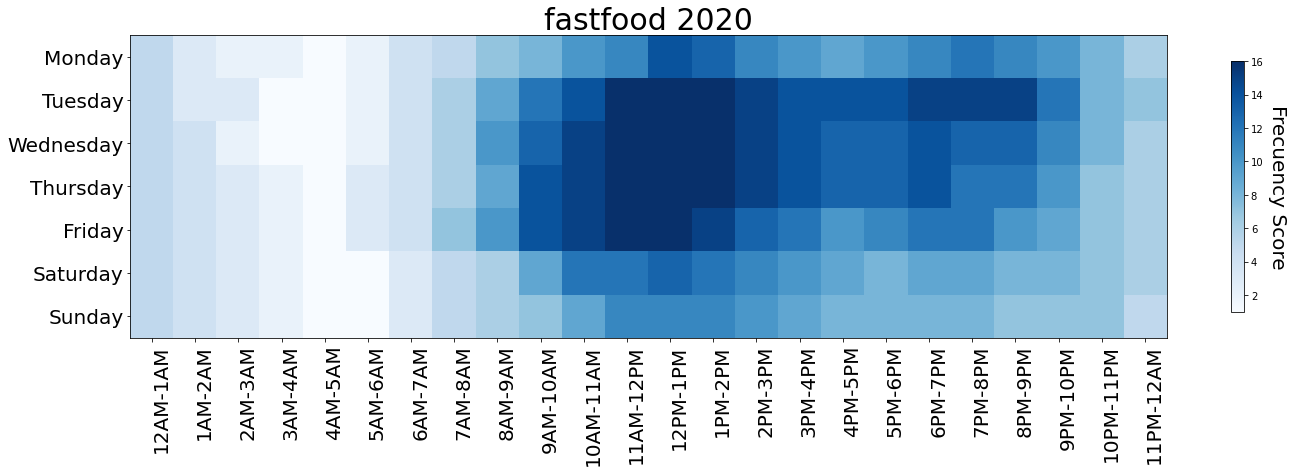

In [20]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

#[[5, 3, 2, 2, 1, 2, 4, 5, 7, 8, 10, 11, 14, 13, 11, 10, 9, 10, 11, 12, 11, 10, 8, 6], [5, 3, 3, 1, 1, 2, 4, 6, 9, 12, 14, 16, 16, 16, 15, 14, 14, 14, 16, 15, 15, 12, 8, 7], [5, 4, 2, 1, 1, 2, 4, 6, 10, 13, 15, 16, 16, 16, 15, 14, 13, 13, 14, 13, 13, 11, 8, 6], [5, 4, 3, 2, 1, 3, 4, 6, 9, 14, 15, 16, 16, 16, 15, 14, 13, 13, 14, 12, 12, 10, 7, 6], [5, 4, 3, 2, 1, 3, 4, 7, 10, 14, 15, 16, 16, 15, 13, 12, 10, 11, 12, 12, 10, 9, 7, 6], [5, 4, 3, 2, 1, 1, 3, 5, 6, 9, 12, 12, 13, 12, 11, 10, 9, 8, 9, 9, 8, 8, 7, 6], [5, 4, 3, 2, 1, 1, 3, 5, 6, 7, 9, 11, 11, 11, 10, 9, 8, 8, 8, 8, 7, 7, 7, 5]]

tweet_score=[[5, 3, 2, 2, 1, 2, 4, 5, 7, 8, 10, 11, 14, 13, 11, 10, 9, 10, 11, 12, 11, 10, 8, 6], [5, 3, 3, 1, 1, 2, 4, 6, 9, 12, 14, 16, 16, 16, 15, 14, 14, 14, 15, 15, 15, 12, 8, 7], [5, 4, 2, 1, 1, 2, 4, 6, 10, 13, 15, 16, 16, 16, 15, 14, 13, 13, 14, 13, 13, 11, 8, 6], [5, 4, 3, 2, 1, 3, 4, 6, 9, 14, 15, 16, 16, 16, 15, 14, 13, 13, 14, 12, 12, 10, 7, 6], [5, 4, 3, 2, 1, 3, 4, 7, 10, 14, 15, 16, 16, 15, 13, 12, 10, 11, 12, 12, 10, 9, 7, 6], [5, 4, 3, 2, 1, 1, 3, 5, 6, 9, 12, 12, 13, 12, 11, 10, 9, 8, 9, 9, 8, 8, 7, 6], [5, 4, 3, 2, 1, 1, 3, 5, 6, 7, 9, 11, 11, 11, 10, 9, 8, 8, 8, 8, 7, 7, 7, 5]]

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Blues)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)


plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("fastfood 2020", fontsize = 30)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [13]:
#quantile 
import numpy as np
data=[1270, 762, 517, 399, 294, 445, 905, 1646, 2365, 2900, 3169, 3407, 3850, 3604, 3379, 3151, 3085, 3231, 3360, 3471, 3296, 3235, 2742, 2047,1404, 826, 528, 343, 363, 499, 1037, 2017, 3020, 3520, 3842, 4043, 4593, 4372, 3853, 3830, 3764, 3719, 4108, 3931, 3851, 3550, 2878, 2191,1473, 863, 519, 351, 333, 492, 1029, 2162, 3257, 3650, 3873, 4079, 4630, 4240, 3956, 3789, 3644, 3684, 3763, 3633, 3621, 3342, 2934, 2109,1469, 892, 579, 396, 354, 531, 1111, 2078, 3041, 3736, 3924, 4089, 4515, 4099, 4036, 3836, 3645, 3597, 3719, 3595, 3513, 3224, 2682, 2129,1373, 869, 566, 416, 357, 559, 1139, 2298, 3284, 3790, 3952, 4205, 4381, 4020, 3666, 3459, 3219, 3324, 3431, 3419, 3136, 2942, 2491, 2063,1572, 969, 665, 406, 356, 367, 662, 1367, 2148, 2952, 3584, 3555, 3692, 3541, 3334, 3098, 3028, 2881, 2937, 2971, 2879, 2761, 2334, 1898,1473, 1072, 651, 472, 347, 359, 551, 1147, 1776, 2646, 3096, 3290, 3318, 3371, 3146, 2972, 2818, 2742, 2825, 2806, 2731, 2492, 2183, 1731]
 
quartile_1 = np.quantile(data, 0.0625)
quartile_2 = np.quantile(data, 0.125)
quartile_3 = np.quantile(data, 0.1875)
quartile_4 = np.quantile(data, 0.25)
quartile_5 = np.quantile(data, 0.3125)
quartile_6 = np.quantile(data, 0.375)
quartile_7 = np.quantile(data, 0.4325)
quartile_8 = np.quantile(data, 0.5)
quartile_9 = np.quantile(data, 0.5625)
quartile_10 = np.quantile(data, 0.625)
quartile_11 = np.quantile(data, 0.6875)
quartile_12 = np.quantile(data, 0.75)
quartile_13 = np.quantile(data, 0.8125)
quartile_14 = np.quantile(data, 0.875)
quartile_15 = np.quantile(data, 0.9325)
quartile_16 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5,
      quartile_6,
      quartile_7,
      quartile_8)

379.6875 526.875 837.5625 1145.0 1739.4375 2175.125 2733.5025 2935.5


In [21]:
fig.savefig("time_grid_fastfood_2020.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)